<Figure size 1000x500 with 0 Axes>

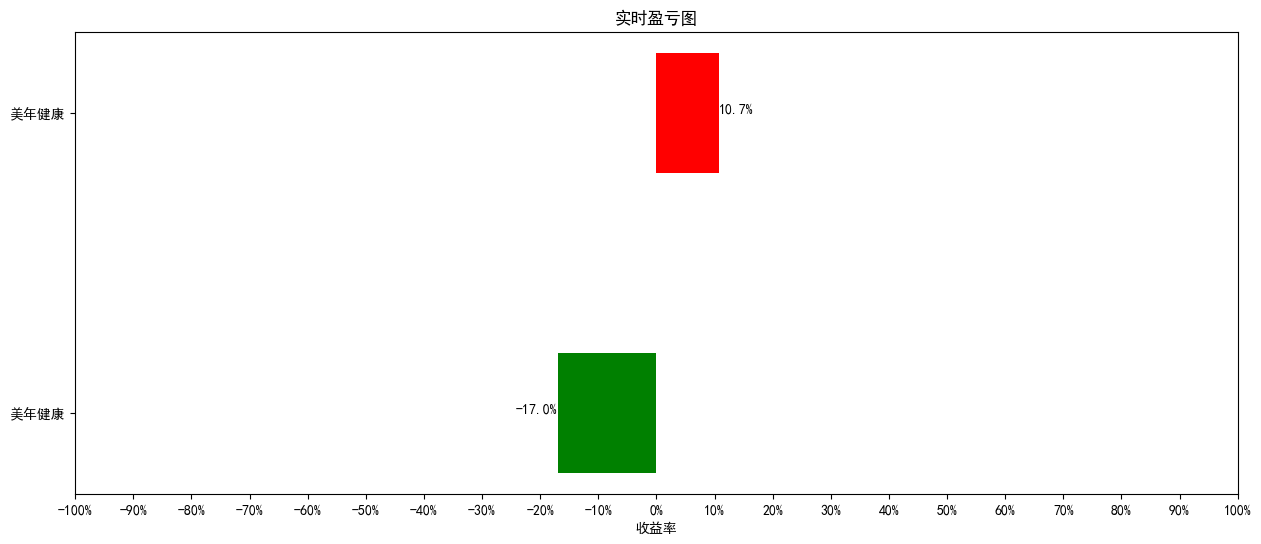

In [ ]:
import akshare as ak
import numpy as np
import random
import time
from datetime import datetime
import pandas as pd
#from easydl import clear_output

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import mpl
import matplotlib 

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

nameList = ['美年健康', '美年健康']
codeList = ['002044', '002044']
buyPricesList = [6.0, 4.5]
buydateList = ['2023-12-13', '2023-12-13']
currDict = {}

start_date = datetime.strptime('2023-12-12', "%Y-%m-%d")
end_date = datetime.strptime('2024-01-11', "%Y-%m-%d")

#定义随机生成颜色函数
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color ="#"+''.join([random.choice(colorArr) for i in range(6)])
    return color

def get_24h_str():
    return  time.strftime('%H:%M:%S', time.localtime())
    
def set_date(df, key):
    date_list = df[key].to_list()
    date_index=[]
    for date_elem in date_list:
        date_index.append(date_elem.strftime('%Y-%m-%d'))
    return df.set_axis(date_index)


mpl.rcParams['font.sans-serif']=['simhei']# 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['figure.figsize'] = (15.0, 6.0)


# 每次调用都将放入采集到的当前行情入dict
def collect_daily_curr():
    df = ak.stock_zh_a_spot_em()
    df= df.set_index("代码")
    for code in codeList:
        data ={
            'time': time,
            'price': df.loc[code, '最新价'],
            'vol': df.loc[code, '成交量'],
            'code': code
        }
        currDict[code] = data
       

def build_rate_list():
    negative_rate_list = []
    positive_rate_list = []
    for idx in range(len(codeList)):
        dt = currDict[codeList[idx]]
        rate = (dt['price'] - buyPricesList[idx])/ buyPricesList[idx] *100
        rate = round(rate, 1)
        if rate < 0:
            negative_rate_list.append(rate)
            positive_rate_list.append(0.0)
        else:
            negative_rate_list.append(0.0)
            positive_rate_list.append(rate)
        
    return (positive_rate_list, negative_rate_list)
    
        
for idx in range(10000):
    
    collect_daily_curr()
    
    rate_list = build_rate_list()

    plt.figure(figsize=(10,5))
    x = np.arange(len(rate_list[0]))
    #print(rate_list[0])
    #print(rate_list[1])
    #print(x)


    fig, ax = plt.subplots()
    hbars1 = ax.barh(x, rate_list[0], fc="red",  height=0.4, tick_label=nameList)
    hbars2 = ax.barh(x, rate_list[1], fc="green", height=0.4, tick_label=nameList)
    #ax.bar_label(hbars1, fmt='%f')
    #ax.bar_label(hbars2, fmt='%f')  
    #ax.set_xlim(right=15)
    for index, value in enumerate(rate_list[0]):
        if value == 0.0:
            continue
        ax.text(value , index,str(value) + '%', horizontalalignment='left')
            
    for index, value in enumerate(rate_list[1]):
        if value == 0.0:
            continue
        ax.text(value, index,str(value) + '%', horizontalalignment='right')
        
    # 设置标题
    plt.title("实时盈亏图")

    # 设置坐标轴名称
    ax.set_xlabel("收益率")
    ax.set_xticks(list(range(-100, 101, 10)))
    xticks_labels = list(str(x)+'%' for x in range(-100, 101, 10))
    #print(xticks_labels)
    ax.set_xticklabels(xticks_labels)
    
    plt.show()
    plt.pause(3)
    if is_ipython:
        display.clear_output(wait=True)